# data preprocessing 

dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## a) Load the data 

In [3]:
dataset = pd.read_csv('data.csv')

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## b) Display the data frame information 

In [5]:
dataset.shape

(569, 33)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [8]:
len(dataset.select_dtypes(include='object').columns)

1

In [9]:
dataset.select_dtypes(include=['float64','int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
len(dataset.select_dtypes(include=['float64','int64']).columns)

32

## c) Display the first and last tuples of the data set 

In [11]:

print(dataset.head(1))

print(dataset.tail(1))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   

   fractal_dimension_worst  Unnamed: 32  
0                   0.1189          NaN  

[1 rows x 33 columns]
        id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
568  92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
568          0.05263           0.04362     

## d) Display the descriptive statistics  

In [12]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## missing values

In [14]:
dataset.isnull().values.any()

True

In [15]:
 dataset.isnull().values.sum()

569

In [16]:
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [17]:
len(dataset.columns[dataset.isnull().any()])

1

In [18]:
dataset['Unnamed: 32'].count()

0

In [19]:
dataset = dataset.drop(columns='Unnamed: 32')

In [20]:
dataset.shape

(569, 32)

In [38]:
dataset.isnull().values.any()

False

# e) Display the class label distribution 

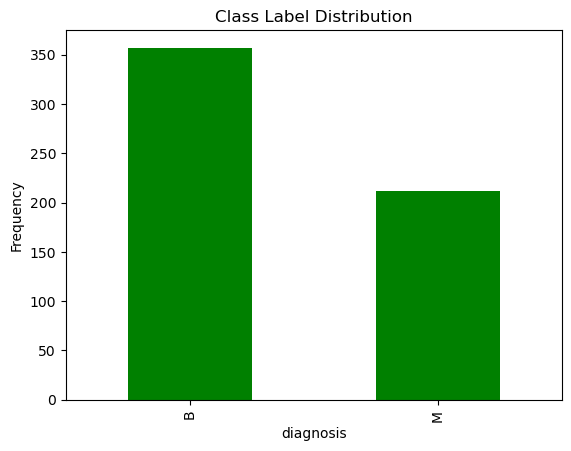

In [39]:
class_freq = dataset['diagnosis'].value_counts()

class_freq.plot(kind='bar', color='green')
plt.xlabel('diagnosis')
plt.ylabel('Frequency')
plt.title('Class Label Distribution')
plt.show()


# f) Use seaborn to display count plot for the class label 

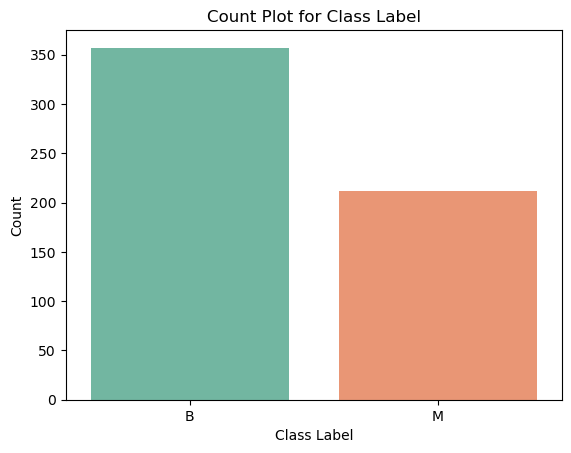

In [43]:
class_freq = dataset['diagnosis'].value_counts()

sns.countplot(x='diagnosis', data=dataset, order=class_freq.index, palette='Set2')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Count Plot for Class Label')
plt.show()

# g) Use seaborn to display a joint plot with any two variables of your choice. 

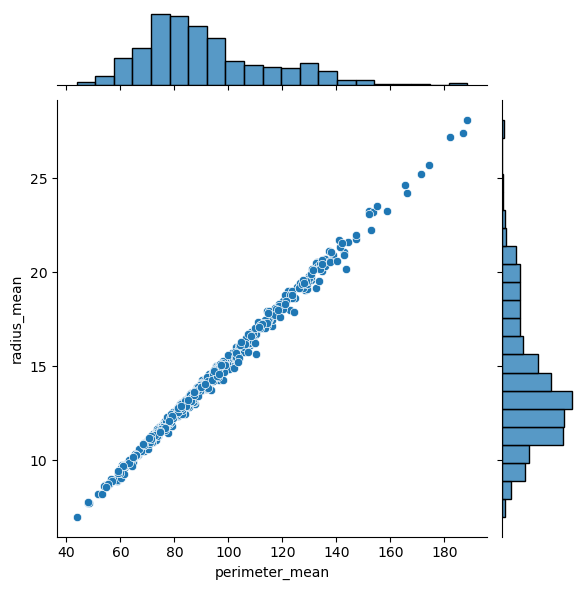

In [42]:
sns.jointplot(data=dataset, x='perimeter_mean', y='radius_mean', kind='scatter')
plt.show()

## Determine based in the data set, whether you want to use category encoders

In [44]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [45]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [46]:
dataset['diagnosis'].nunique()

2

In [47]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [53]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [54]:
dataset['diagnosis_M'] = dataset['diagnosis_M'].astype(int)


## countplot

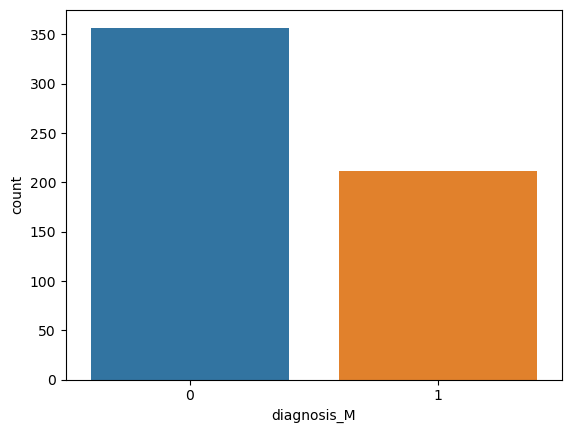

In [56]:
sns.countplot(x='diagnosis_M', data=set, label='count')
plt.show()

## i) Split the data such that 25% is reserved testing 

In [57]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [58]:
x = dataset.iloc[:,1:-1].values

In [59]:
x.shape

(569, 30)

In [60]:
y = dataset.iloc[:,-1].values

In [61]:
y.shape

(569,)

In [62]:
from sklearn.model_selection import train_test_split

In [65]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## j) Show the shape of training set and the test set 

In [66]:
x_train.shape

(426, 30)

In [67]:
x_test.shape

(143, 30)

In [68]:
y_train.shape

(426,)

In [69]:
y_test.shape

(143,)

#  k) Train a model using K-NN  

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = knn.predict(x_test)

### a. Show the confusion matrix 

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[88  1]
 [ 4 50]]


### b. Show the heat map 

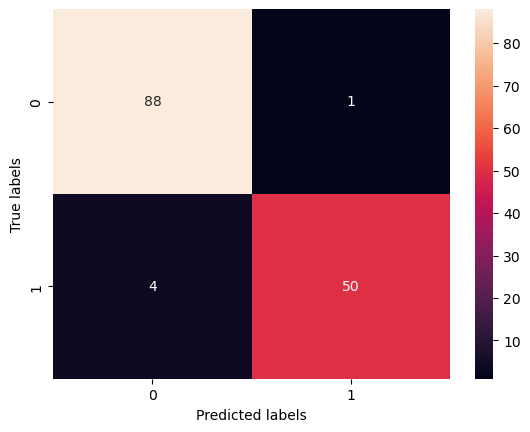

In [74]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### c. Show the classification accuracy  

In [76]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {knn_accuracy}')

Classification Accuracy: 0.965034965034965


### d. Compare the training and testing accuracy  

In [78]:
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = knn_accuracy

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9342723004694836
Testing Accuracy: 0.965034965034965


#  l) Train a model using SVM 

In [79]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [80]:
y_pred = svm_model.predict(x_test)

### a. Show the confusion matrix  

In [81]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[87  2]
 [ 4 50]]


### b. Show the heat map  

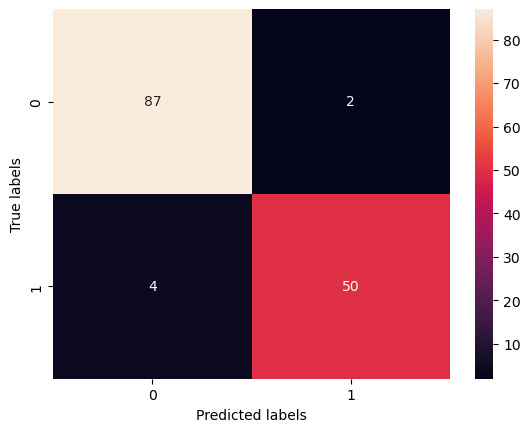

In [83]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### c. Show the classification accuracy 

In [84]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {svm_accuracy}')

Classification Accuracy: 0.958041958041958


### d. Compare the training and testing accuracy 

In [85]:
y_train_pred = svm_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = svm_accuracy

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9694835680751174
Testing Accuracy: 0.958041958041958


# m) Train a model using Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred = dtree.predict(x_test)

### a. Show the confusion matrix  

In [89]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[84  5]
 [ 3 51]]


### b. Show the heat map 

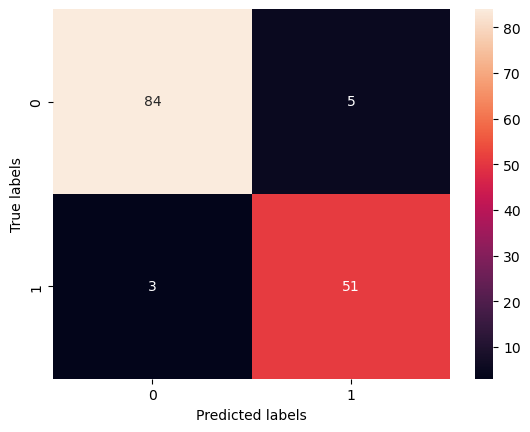

In [90]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### c. Show the classification accuracy  

In [91]:
from sklearn.metrics import accuracy_score


dtree_accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {dtree_accuracy}')

Classification Accuracy: 0.9440559440559441


### d. Compare the training and testing accuracy  

In [92]:
y_train_pred = dtree.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = dtree_accuracy

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Testing Accuracy: 0.9440559440559441


# Train a model using Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [94]:
y_pred = rf.predict(x_test)

### a. Show the confusion matrix  

In [95]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[87  2]
 [ 3 51]]


### b. Show the heat map  

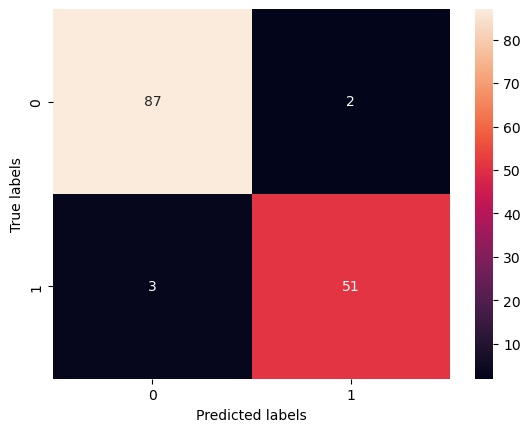

In [96]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### c. Show the classification accuracy  

In [97]:
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {rf_accuracy}')

Classification Accuracy: 0.965034965034965


### d. Compare the training and testing accuracy  

In [98]:
y_train_pred = rf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = rf_accuracy

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Testing Accuracy: 0.965034965034965


# o) Demonstrate by way of a plot, which ml algorithm performs better from your results above.

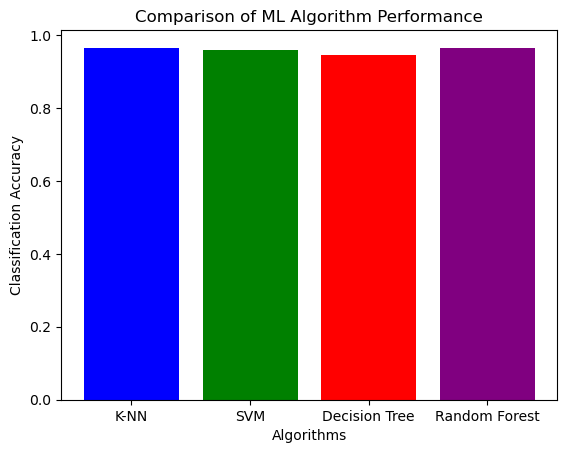

In [99]:
import matplotlib.pyplot as plt

accuracies = {'K-NN': knn_accuracy, 'SVM': svm_accuracy, 'Decision Tree': dtree_accuracy, 'Random Forest': rf_accuracy}

algorithms = list(accuracies.keys())

accuracy_values = list(accuracies.values())

plt.bar(algorithms, accuracy_values, color=['blue', 'green', 'red', 'purple'])

plt.title('Comparison of ML Algorithm Performance')
plt.xlabel('Algorithms')
plt.ylabel('Classification Accuracy')

plt.show()